# Homework 4: Solutions


<br>

**Conceptual:** Short answer questions. Be concise.

---
1. Consider the problem of classifying a binary response variable (i.e., $y \in \{1,0\}$). If there is no overlap in the values of X when y = 1 and when y=0,  such that there is a large “gap” between the two distributions of X values, then this is problematic for one of the classifiers discussed in class and the text. What classifier does this situation pose a problem for? Explain conceptually why this is a problem and compare it with another classifier approach that does not suffer this limitation.

**Answer:**


This is a problem for logistic regression. Because the seperation is very clean, multiple log functions can fit the same dataset. In this case, Linear Discriminent Analysis is a better classifier approach.

---
2. Compare logistic regression, LDA, and kNN classification approaches. Which are parametric which are non-parametric? For parametric models what functions do they assume? For non-parametric methods, how do the classifiers separate groups? How is the flexibility/bias tradeoff adjusted for each method?

**Answer:** 


Logistic regression and LDA are parametric while kNN is non-parametric.

Logistic regression requires the outcome only contain 2 classes, when the classes are poorly separated, and when n is large. LDA requires the predictor variables to be drawn from a multivariate normal distribution, homogeneity of variance / covariance, no multicollinearity, and independence of errors.

kNN separate groups by taking the average of its k neighbours.

Flexibility/bias tradeoff:
- of logistic regression can be adjusted by varying the amount of predictor variables and the complexity of the logarithm of the odds function. 
- of LDA cannot be manipulated
- for KNN can be adjusted by changing the number of neighbors.

---
3. What is the curse of dimensionality? Why is it especially problematic for kNN classification (i.e., why does kNN fail in high dimensional contexts)?


**Answer:**


The curse of dimensionality arises when there are a lot of features (compared to the number of observations), causing high sparsity in the data set and requiring expotentially amount of time and power for processing.

KNN fails with high dimensionalities because data gets sparse as dimensionality rises. This makes it harder to find neighbors, causing weird outcomes.

---
4. Suppose that we take a data set, divide it into equally-sized training and test sets, and then try out two different classification procedures. First we use logistic regression and get an error rate of 20% on the training data and 30% on the test data. Next we use 1-nearest neighbors (i.e. K = 1) and get an average error rate (averaged over both test and training data sets) of 18%. Based on these results, which method should we prefer to use for classification of new observations? Why?

**Answer:** 

For KNN with K=1, the training error rate is 0% because for any training observation, its nearest neighbor will be the response itself. So, that means that KNN has a test error rate of 36%. Thus logistic regression is preferred because of its lower test error rate of only 30%.

---
**Applied:** Show your code & plots
(Exercises 4.10 and 4.11 from ISLR.)

---

5. This question should be answered using the Weekly data set, which is part of the ISLR package. This data is similar in nature to the Smarket data from this chapter’s lab, except that it contains 1,089 weekly returns for 21 years, from the beginning of 1990 to the end of 2010.

(a) Produce some numerical and graphical summaries of the Weekly data. Do there appear to be any patterns?

(b) Use the full data set to perform a logistic regression with Direction as the response and the five lag variables plus Volume as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?

(c) Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.

(d) Now fit the logistic regression model using a training data period from 1990 to 2008, with Lag2 as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010).

(e) Repeat (d) using LDA.

(f) Repeat (d) using QDA.

(g) Repeat (d) using KNN with K = 1.

(h) Which of these methods appears to provide the best results on
this data?

(i) Experiment with different combinations of predictors, includ- ing possible transformations and interactions, for each of the methods. Report the variables, method, and associated confu- sion matrix that appears to provide the best results on the held out data. Note that you should also experiment with values for K in the KNN classifier.

      Year           Lag1               Lag2               Lag3         
 Min.   :1990   Min.   :-18.1950   Min.   :-18.1950   Min.   :-18.1950  
 1st Qu.:1995   1st Qu.: -1.1540   1st Qu.: -1.1540   1st Qu.: -1.1580  
 Median :2000   Median :  0.2410   Median :  0.2410   Median :  0.2410  
 Mean   :2000   Mean   :  0.1506   Mean   :  0.1511   Mean   :  0.1472  
 3rd Qu.:2005   3rd Qu.:  1.4050   3rd Qu.:  1.4090   3rd Qu.:  1.4090  
 Max.   :2010   Max.   : 12.0260   Max.   : 12.0260   Max.   : 12.0260  
      Lag4               Lag5              Volume            Today         
 Min.   :-18.1950   Min.   :-18.1950   Min.   :0.08747   Min.   :-18.1950  
 1st Qu.: -1.1580   1st Qu.: -1.1660   1st Qu.:0.33202   1st Qu.: -1.1540  
 Median :  0.2380   Median :  0.2340   Median :1.00268   Median :  0.2410  
 Mean   :  0.1458   Mean   :  0.1399   Mean   :1.57462   Mean   :  0.1499  
 3rd Qu.:  1.4090   3rd Qu.:  1.4050   3rd Qu.:2.05373   3rd Qu.:  1.4050  
 Max.   : 12.0260   Max.   : 12.0

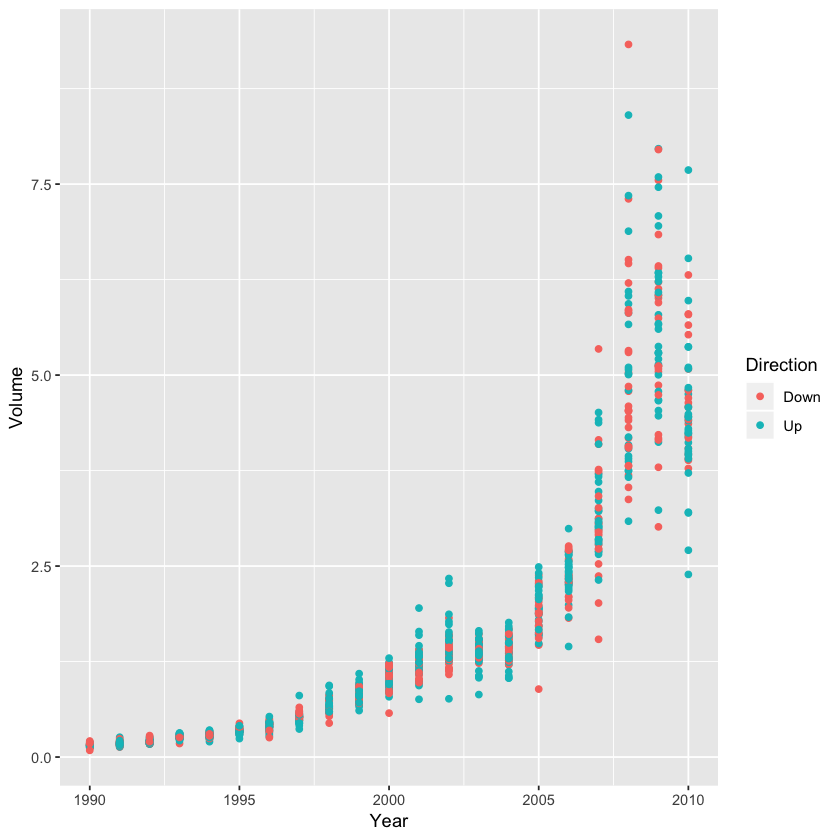

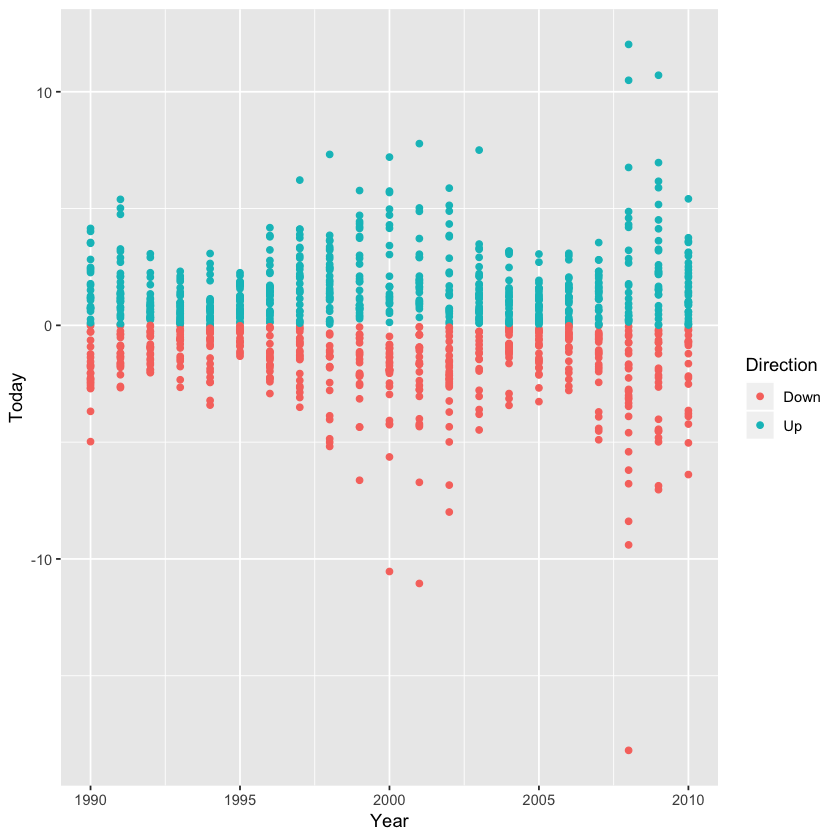

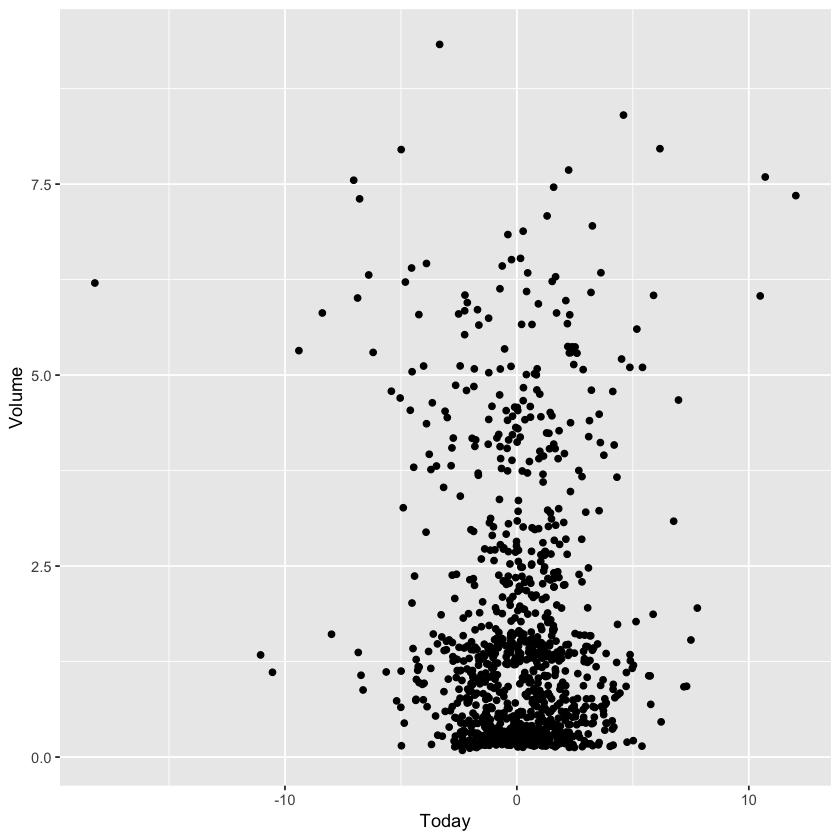

In [34]:
# ------------------
# Exercize 5
# ------------------
library("ISLR")
library(ggplot2)

#a) Produce some numerical and graphical summaries of the Weekly data. Do there appear to be any patterns?
summary(Weekly)
ggplot(Weekly, aes(x=Year, y=Volume, color=Direction)) +
    geom_point() +
    scale_x_continuous(name = 'Year')

ggplot(Weekly, aes(x=Year, y=Today, color=Direction)) +
    geom_point() +
    scale_x_continuous(name = 'Year')

ggplot(Weekly, aes(x=Today, y=Volume)) +
    geom_point()

# The volumn increases almost every year. The variance in volume also increases every year.
# It seems that the amount of positive percentage return and the amount of negative percentage return are roughly the same
# In certain years (e.g., 2010) the variance in percentage return is smaller than others (e.g., 2008), suggesting that in certain years, some people lose/gain much more than other years.
# Most trades are small volumees

In [14]:
#(b) Use the full data set to perform a logistic regression with Direction as the response and the five lag variables plus Volume as predictors. Use the summary function to print the results. 
#    Do any of the predictors appear to be statistically significant? If so, which ones?
glm.fit=glm(Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume, data=Weekly, family=binomial) # logistic regression 
summary(glm.fit)

# Lag2 is significant, suggesting percentage return for 2 weeks previous significantly impacts direction of return of the current week.


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = Weekly)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6949  -1.2565   0.9913   1.0849   1.4579  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.26686    0.08593   3.106   0.0019 **
Lag1        -0.04127    0.02641  -1.563   0.1181   
Lag2         0.05844    0.02686   2.175   0.0296 * 
Lag3        -0.01606    0.02666  -0.602   0.5469   
Lag4        -0.02779    0.02646  -1.050   0.2937   
Lag5        -0.01447    0.02638  -0.549   0.5833   
Volume      -0.02274    0.03690  -0.616   0.5377   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1496.2  on 1088  degrees of freedom
Residual deviance: 1486.4  on 1082  degrees of freedom
AIC: 1500.4

Number of Fisher Scoring iterations: 4


In [26]:
#(c) Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.
contrasts(Weekly$Direction)
predict <- predict(glm.fit, type = 'response')

result_t <- table(Weekly$Direction, predict > 0.5)
colnames(result_t) = c('predictedDown', 'predictedUp')
result_t

accuracy <- table(predict>0.5, Weekly[,"Direction"])
sum(diag(accuracy))/sum(accuracy)

# Most errors occur when the stock goes down and the prediction returns up. It appears that the model has a tendency to predict Up.

,Up
Down,0
Up,1


      
       predictedDown predictedUp
  Down            54         430
  Up              48         557

[1] 0.5610652

In [54]:
#(d) Now fit the logistic regression model using a training data period from 1990 to 2008, with Lag2 as the only predictor. 
#    Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010).

train <- subset(Weekly, Weekly$Year<=2008)
glm.train <- glm(Direction~Lag2, data=train, family=binomial)

test <- subset(Weekly, Weekly$Year>2008)
predict <- predict(glm.train, newdata=test, type = 'response')

result_t <- table(test$Direction, predict > 0.5)
colnames(result_t) = c('predictedDown', 'predictedUp')
result_t

accuracy <- table(predict>0.5, test[,"Direction"])
sum(diag(accuracy))/sum(accuracy)

# Overall % correctly predicted is 0.625 on the test data.

      
       predictedDown predictedUp
  Down             9          34
  Up               5          56

[1] 0.625

In [22]:
library(MASS)

#(e) Repeat (d) using LDA.
train <- subset(Weekly, Weekly$Year<=2008)
lda.train <- lda(Direction~Lag2, data=train, family=binomial)

test <- subset(Weekly, Weekly$Year>2008)
lda.predict <- predict(lda.train, newdata=test)

result_t <- table(test$Direction, lda.predict$class)
result_t

accuracy <- table(lda.predict$class, test[,"Direction"])
sum(diag(accuracy))/sum(accuracy)


      
       Down Up
  Down    9 34
  Up      5 56

[1] 0.625

In [30]:
#(f) Repeat (d) using QDA.
train <- subset(Weekly, Weekly$Year<=2008)
qda.train <- qda(Direction~Lag2, data=train, family=binomial)

test <- subset(Weekly, Weekly$Year>2008)
qda.predict <- predict(qda.train, newdata=test)

result_t <- table(test$Direction, qda.predict$class)
result_t

accuracy <- table(qda.predict$class, test[,"Direction"])
sum(diag(accuracy))/sum(accuracy)


      
       Down Up
  Down    0 43
  Up      0 61

[1] 0.5865385

In [32]:
library("class")
#(g) Repeat (d) using KNN with K = 1.
knn_train <- subset(Weekly, Weekly$Year<=2008)
knn_test <- subset(Weekly, Weekly$Year>2008)



test_pred <- knn(train = data.frame(knn_train$Lag2), test = data.frame(knn_test$Lag2),cl = knn_train$Direction, k=1)
accuracy <- table(test_pred, knn_test[,"Direction"])
sum(diag(accuracy))/sum(accuracy)

#(h) Which of these methods appears to provide the best results on this data? - Both LDA and Logistic Regression did equally well.

[1] 0.5096154

---


6. In this problem, you will develop a model to predict whether a given car gets high or low gas mileage based on the Auto data set.

(a) Create a binary variable, mpg01, that contains a 1 if mpg contains a value above its median, and a 0 if mpg contains a value below its median. You can compute the median using the median() function. Note you may find it helpful to use the data.frame() function to create a single data set containing both mpg01 and the other Auto variables.

(b) Explore the data graphically in order to investigate the associ- ation between mpg01 and the other features. Which of the other features seem most likely to be useful in predicting mpg01? Scatterplots and boxplots may be useful tools to answer this ques- tion. Describe your findings.

(c) Split the data into a training set and a test set.

(d) Perform LDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

(e) Perform QDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

(f) Perform logistic regression on the training data in order to pre- dict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

(g) Perform KNN on the training data, with several values of K, in order to predict mpg01. Use only the variables that seemed most associated with mpg01 in (b). What test errors do you obtain? Which value of K seems to perform the best on this data set?

mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
18,8,307,130.0,3504,12.0,70,1,chevrolet chevelle malibu,0
15,8,350,165.0,3693,11.5,70,1,buick skylark 320,0
18,8,318,150.0,3436,11.0,70,1,plymouth satellite,0
16,8,304,150.0,3433,12.0,70,1,amc rebel sst,0
17,8,302,140.0,3449,10.5,70,1,ford torino,0
15,8,429,198.0,4341,10.0,70,1,ford galaxie 500,0


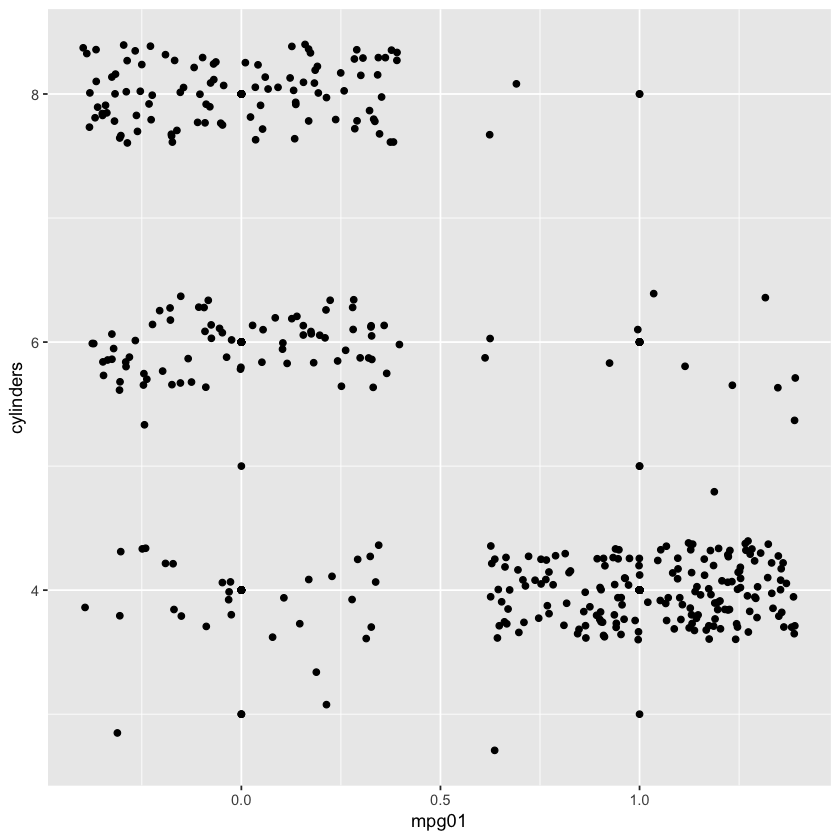

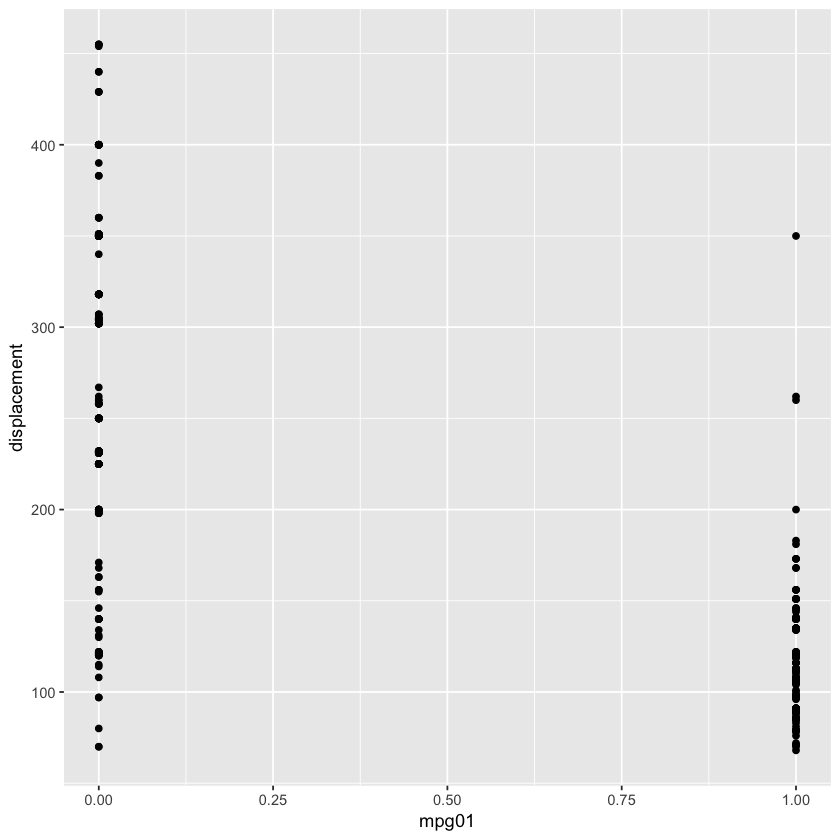

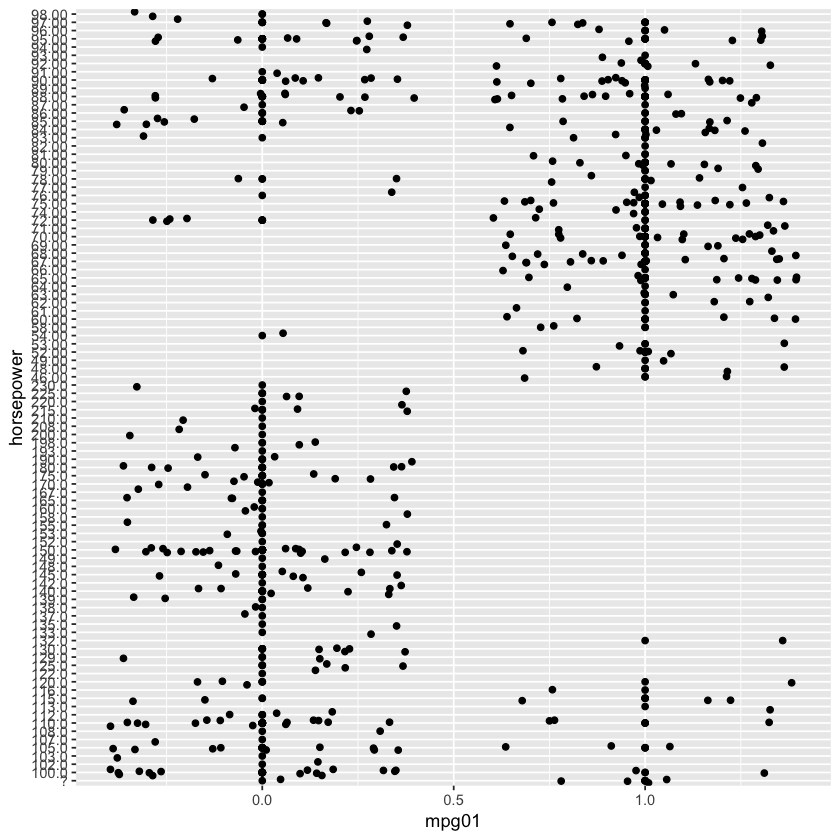

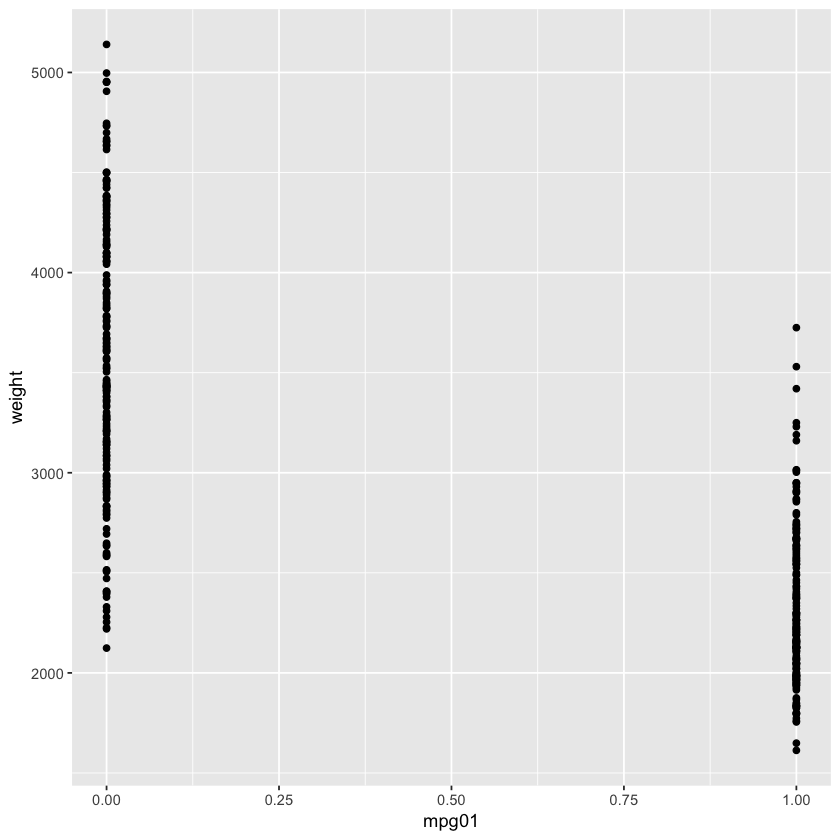

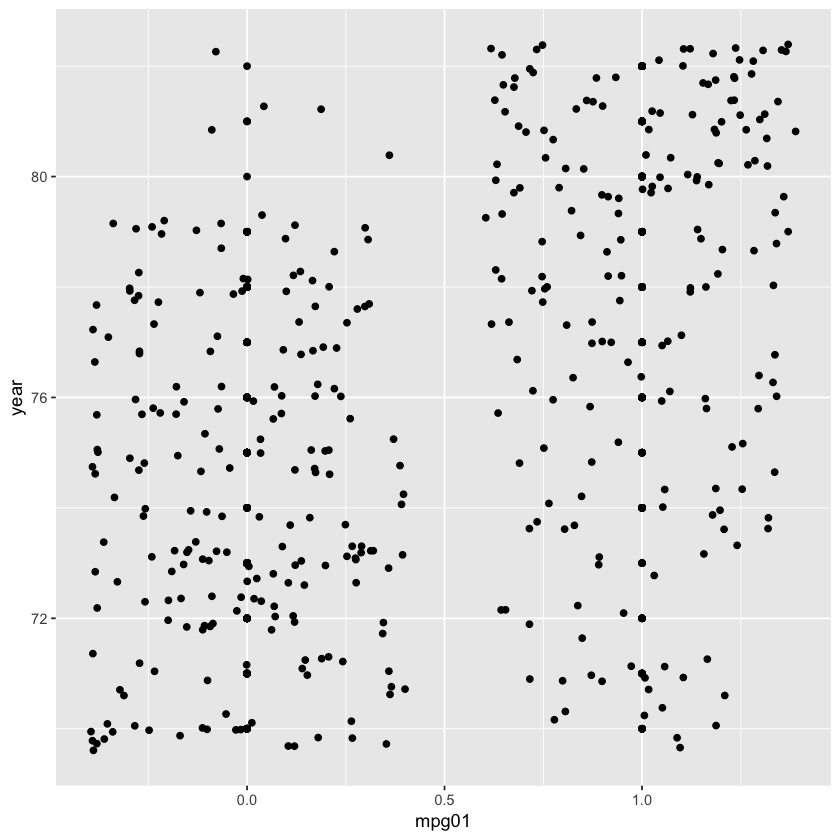

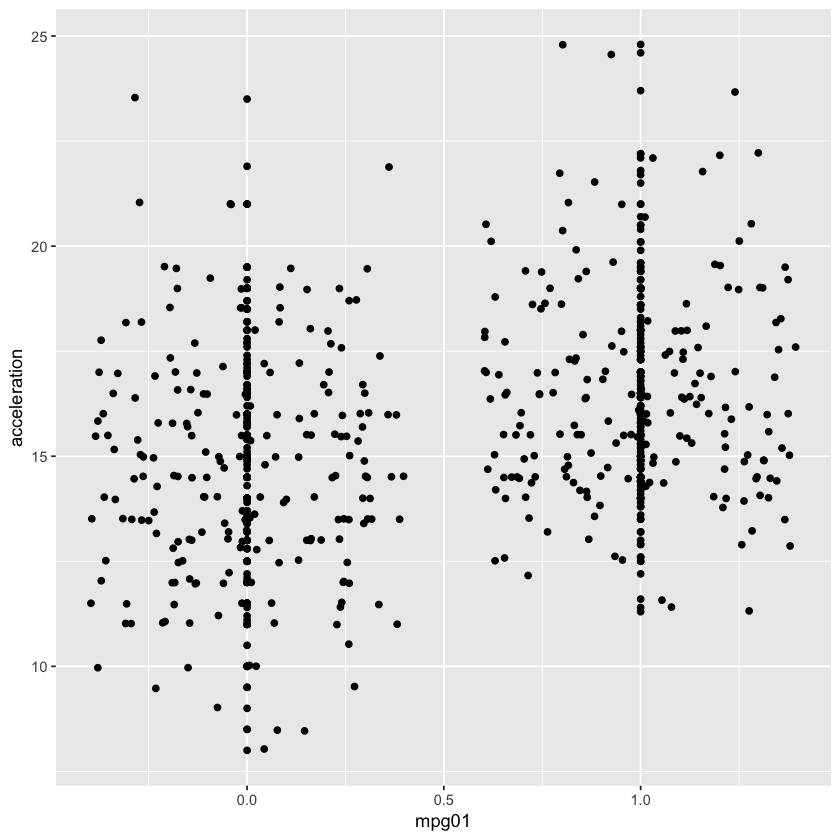

In [23]:
# ------------------
# Exercize 6
# ------------------
Auto <- read.table("Auto.data", header=TRUE)
# (a) Create a binary variable, mpg01, that contains a 1 if mpg contains a value above its median, and a 0 if mpg contains a value below its median. 
#     You can compute the median using the median() function. Note you may find it helpful to use the data.frame() function to create a single data set containing both mpg01 and the other Auto variables.

Auto$mpg01 <- as.integer(as.logical(Auto$mpg > median(Auto$mpg)))
head(Auto)


# (b) Explore the data graphically in order to investigate the association between mpg01 and the other features. 
#     Which of the other features seem most likely to be useful in predicting mpg01? Scatterplots and boxplots may be useful tools to answer this question. Describe your findings.
ggplot(Auto, aes(x=mpg01, y=cylinders)) +
    geom_point() +
    geom_jitter()

ggplot(Auto, aes(x=mpg01, y=displacement)) +
    geom_point()

ggplot(Auto, aes(x=mpg01, y=horsepower)) +
    geom_point() +
    geom_jitter()

ggplot(Auto, aes(x=mpg01, y=weight)) +
    geom_point()

ggplot(Auto, aes(x=mpg01, y=year)) +
    geom_point() +
    geom_jitter()

ggplot(Auto, aes(x=mpg01, y=acceleration)) +
    geom_point() +
    geom_jitter()

# Cars with lower displacement are more likely to have higher than median mpg
# Cars with higher horsepower are more likely to have higher than median mpg
# Cars that weight less are more likely to have higher than median mpg
# Cars with higher acceleration are more likely to have higher than median mpg

In [25]:
# (c) Split the data into a training set and a test set.
smp_size <- floor(0.75 * nrow(Auto))

set.seed(123)
train_ind <- sample(seq_len(nrow(Auto)), size = smp_size)

train <- Auto[train_ind, ]
test <- Auto[-train_ind, ]

# (d) Perform LDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?
lda.train <- lda(mpg01~cylinders+displacement+weight+acceleration, data=train, family=binomial)

lda.predict <- predict(lda.train, newdata=test)

result_t <- table(test$mpg01, lda.predict$class)
result_t

accuracy <- table(lda.predict$class, test[,"mpg01"])
sum(diag(accuracy))/sum(accuracy)


   
     0  1
  0 40 10
  1  0 50

[1] 0.9

In [26]:
# (e) Perform QDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?
qda.train <- qda(mpg01~cylinders+displacement+weight+acceleration, data=train, family=binomial)

qda.predict <- predict(qda.train, newdata=test)

result_t <- table(test$mpg01, qda.predict$class)
result_t

accuracy <- table(qda.predict$class, test[,"mpg01"])
sum(diag(accuracy))/sum(accuracy)

   
     0  1
  0 43  7
  1  1 49

[1] 0.92

In [28]:
# (f) Perform logistic regression on the training data in order to pre- dict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?
glm.train <- glm(mpg01~cylinders+displacement+weight+acceleration, data=train, family=binomial)

predict <- predict(glm.train, newdata=test, type = 'response')

result_t <- table(test$mpg01, predict > 0.5)
colnames(result_t) = c('predicted0', 'predicted1')
result_t

accuracy <- table(predict>0.5, test[,"mpg01"])
sum(diag(accuracy))/sum(accuracy)


   
    predicted0 predicted1
  0         41          9
  1          1         49

[1] 0.9

In [58]:
# (g) Perform KNN on the training data, with several values of K, in order to predict mpg01. Use only the variables that seemed most associated with mpg01 in (b). What test errors do you obtain? Which value of K seems to perform the best on this data set?
knn_train_features <- train[,c(-1, -4, -7, -8, -9,-10)]
knn_test_features <- test[,c(-1, -4, -7, -8, -9,-10)]
knn_train_label <- train[,"mpg01"]
knn_test_label <- test[,"mpg01"]

test_pred <- knn(train = knn_train_features, test = knn_test_features, cl = knn_train_label, k=1)
accuracy <- table(test_pred, knn_test_label)
accuracy
sum(diag(accuracy))/sum(accuracy)

# Seems to work the best when k = 1

         knn_test_label
test_pred  0  1
        0 44  4
        1  6 46

[1] 0.9